In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from os.path import join

from fixation_extraction import IVT, IDT, IHMM

DATA_PATH = join('..', 'test_data')

In [2]:
def remove_points(df, x_min, x_max, y_min, y_max):
    df = df[df['norm_pos_x'] <= x_max]
    df = df[df['norm_pos_x'] >= x_min]
    df = df[df['norm_pos_y'] >= y_min]
    df = df[df['norm_pos_y'] <= y_max]
    return df

data = pd.concat([pd.read_excel(join(DATA_PATH, 'itog_gaze_1.xlsx')),
                  pd.read_excel(join(DATA_PATH, 'itog_gaze_2.xlsx'))], axis=0)

data.drop(['world_index', 'confidence', 'base_data'], axis=1, inplace=True)
data = remove_points(data, -1, 1, -1, 1)

In [3]:
x = 'norm_pos_x'
y = 'norm_pos_y'
t = 'gaze_timestamp'

In [4]:
ivt = IVT(x=x, y=y, t=t, pk=['Participant', 'tekst'], threshold=5.0,
          distance="manhattan")
ivt_data = ivt.transform(data)
ivt_data

,Participant,tekst,norm_pos_x,norm_pos_y,start_time,end_time,distance_min,distance_max,duration
0,1,1,0.242478,0.508895,317242.694809,317242.902920,0.000250,0.016098,0.208112
1,1,1,0.243361,0.420827,317242.913454,317243.364583,0.000012,0.022712,0.451129
2,1,1,0.203022,0.505477,317243.376751,317243.614467,0.000118,0.023576,0.237715
3,1,1,0.301861,0.503259,317243.633292,317244.088560,0.000200,0.033958,0.455268
4,1,1,0.301874,0.084666,317244.127373,317244.261180,0.000119,0.010765,0.133807
...,...,...,...,...,...,...,...,...,...
4857,2,37,0.364464,0.689684,1830.243028,1830.243028,0.035883,0.035883,0.000000
4858,2,37,0.392382,0.852691,1830.383403,1830.420315,0.006923,0.060376,0.036912
4859,2,37,0.360191,0.727955,1833.255635,1833.255635,0.024697,0.024697,0.000000
4860,2,37,0.348062,0.661388,1833.268271,1833.459384,0.000095,0.014323,0.191114


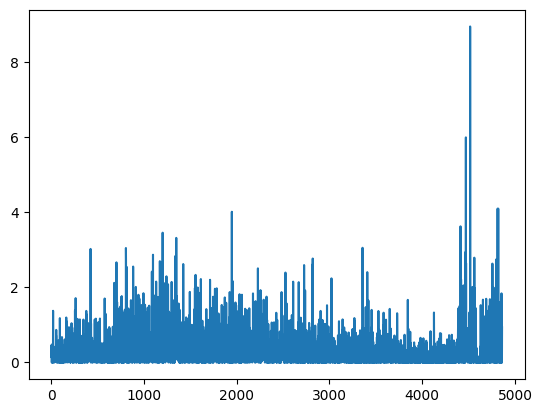

In [5]:
plt.plot(ivt_data.duration)

In [6]:
idt = IDT(x=x, y=y, t=t, pk=['Participant', 'tekst'], min_duration=0.01, max_dispersion=0.05,
          distance="euc")
idt_data = idt.transform(data)
idt_data

,Participant,tekst,norm_pos_x,norm_pos_y,start_time,end_time,distance_min,distance_max,dispersion,duration
0,1,1,0.281380,0.364748,317242.694809,317244.759815,0.000008,0.163336,0.047766,2.065006
1,1,1,0.234825,0.182868,317244.772241,317246.037803,0.000020,0.214331,0.038682,1.265562
2,1,1,0.498244,0.132719,317246.074253,317246.298518,0.000171,0.050777,0.049416,0.224265
3,1,1,0.273942,0.477610,317246.340643,317246.422719,0.000327,0.028566,0.018063,0.082076
4,1,1,0.235197,0.522741,317246.586157,317247.552522,0.000038,0.031539,0.043821,0.966364
...,...,...,...,...,...,...,...,...,...,...
1303,2,36,0.256439,0.903614,1798.252503,1803.973719,0.000000,0.085923,0.041751,5.721216
1304,2,36,0.301996,0.824271,1805.084561,1808.875853,0.000000,0.134379,0.033774,3.791293
1305,2,37,0.241196,0.937269,1812.356852,1822.833558,0.000000,0.092160,0.047594,10.476706
1306,2,37,0.235083,0.903927,1825.584721,1826.388844,0.000000,0.039731,0.023270,0.804124


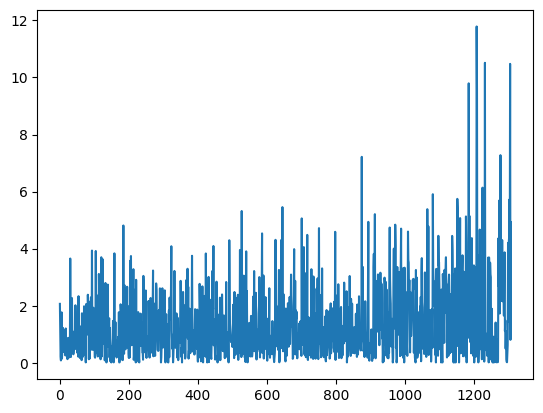

In [7]:
plt.plot(idt_data.duration)

In [8]:
ihmm = IHMM(x=x, y=y, t=t, pk=['Participant', 'tekst'], fix2sac=0.01, sac2fix=0.01, distrib_params='auto',
            distance='chebyshev')
ihmm_data = ihmm.transform(data)
ihmm_data

,Participant,tekst,norm_pos_x,norm_pos_y,start_time,end_time,distance_min,distance_max,duration
0,1,1,0.354452,0.283985,317242.694809,317277.432298,0.0,0.951231,34.737490
1,1,2,0.365546,0.326544,317280.749529,317309.900026,0.0,0.882372,29.150497
2,1,3,0.374687,0.268392,317313.293483,317341.926340,0.0,0.696019,28.632857
3,1,4,0.360139,0.238132,317345.272431,317367.691587,0.0,1.130891,22.419156
4,1,5,0.336839,0.176648,317371.053744,317405.467547,0.0,1.357323,34.413803
...,...,...,...,...,...,...,...,...,...
69,2,33,0.359185,0.727186,1705.124451,1745.768572,0.0,0.220596,40.644121
70,2,34,0.356073,0.816829,1749.169858,1765.304893,0.0,0.795991,16.135035
71,2,35,0.303716,0.845329,1768.748046,1795.284636,0.0,1.223968,26.536590
72,2,36,0.279130,0.875408,1789.523880,1808.881374,0.0,1.223968,19.357494


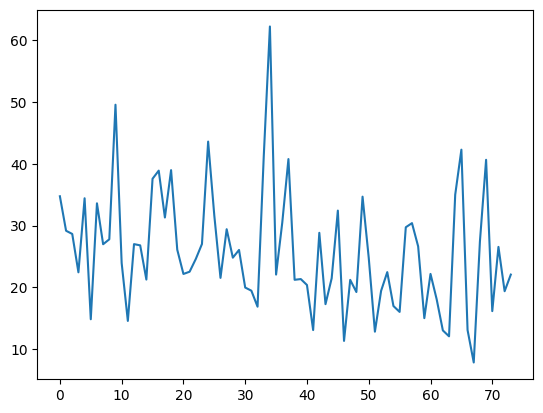

In [9]:
plt.plot(ihmm_data.duration)

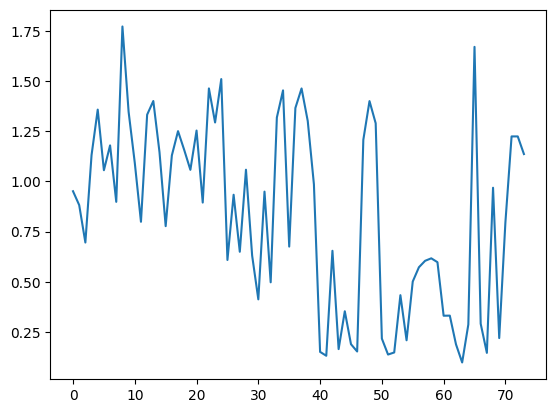

In [10]:
plt.plot(ihmm_data.distance_max)